In [3]:
import networkx as nx
import numpy as np

In [3]:
d = {'1_1': np.array([ 0., -1.]), '2_1': np.array([-0.375, -0.25 ]), '2_2': np.array([ 0.375, -0.25 ]), '3_1': np.array([-0.75,  0.5 ]), '3_2': np.array([0. , 0.5]), '3_3': np.array([0.75, 0.5 ])}

In [4]:
d = {1: {1: {"res": 1}}, 2: {1: {"res": 2}, 2: {"res": 2}}}

d

{1: {1: {'res': 1}}, 2: {1: {'res': 2}, 2: {'res': 2}}}

In [1]:
a = [10, 2]
b, c = tuple(a)

In [3]:
b, c

(10, 2)

# Intro

## Basic

In [5]:
G = nx.Graph()

In [6]:
# add nodes

G.add_node(1) # add
G.add_nodes_from([2, 3]) # or add from any iterable container, e.g. list
G.add_nodes_from([4, 5]) # or add from any iterable container, e.g. list

In [7]:
# add edges

G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

G.add_edges_from([(3, 4), (4, 5), (5, 1)])

## Order

In [8]:
# adj view: order of edge addition determines order
G.adj

AdjacencyView({1: {2: {}, 5: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 1: {}}})

In [9]:
# adj view: order of node addition determines order
G.edges

EdgeView([(1, 2), (1, 5), (2, 3), (3, 4), (4, 5)])

In [53]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds nodes 2 and 1, i.e. no need to use add_node()
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]  # order of nodes determined by order of edges
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]  # order of edges determined by order of nodes


In [55]:
list(DG.edges)

[(2, 1), (2, 4), (1, 3), (1, 2)]

## Constructor power

In [11]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list

In [12]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs

## Dictionary structure

In [13]:
G.edges[1, 2]['color'] = "red"

In [14]:
for (u, v, wt) in G.edges.data('color'):
    print(f"({u}, {v}, {wt})")

(1, 2, red)
(1, 5, None)
(2, 3, None)
(3, 4, None)
(4, 5, None)


## Attribute

In [15]:
node_cf = {
    2: {"res": 1, "k_lower": 1},
    5: {"res": 2, "k_lower": 1},
    8: {"res": 2, "k_lower": 2},
}

edge_cf = {
    7: {"start": 2, "end": 8, "sam": 20},
    11: {"start": 2, "end": 5, "sam": 10},
}

G = nx.Graph()

# example
# G.add_nodes_from([
#     (4, {"color": "red"}),
#     (5, {"color": "green"}),
# ])

G.add_nodes_from(
    [(k, v) for k, v in node_cf.items()]
)

G.add_edges_from(
    [(v["start"], v["end"], v) for v in edge_cf.values()]
)

In [16]:
iris = iris.iloc[::-1]


NameError: name 'iris' is not defined

In [ ]:
iris.groupby('K3')["sepal_length"].sum().to_dict()

{1: 225.5, 2: 265.2, 3: 385.8}

In [ ]:
kk = 3
[szudzik.pair(k_upper, k_lower) for k_lower in range(1, k_upper + 1) for k_upper in range(1, kk + 1)]

[3, 7, 13, 5, 8, 14]

In [ ]:

for k_upper in range(1, kk + 1):
    for k_lower in range(1, k_upper + 1):
        print(iris.groupby(f"K{k_upper}")["sepal_length"].agg(sum).to_dict())
876.5
369.8
506.7
225.5
265.2
385.8

{1: 876.5}
{1: 369.8, 2: 506.7}
{1: 369.8, 2: 506.7}
{1: 225.5, 2: 265.2, 3: 385.8}
{1: 225.5, 2: 265.2, 3: 385.8}
{1: 225.5, 2: 265.2, 3: 385.8}


In [ ]:
G.edges.data()

EdgeDataView([(2, 8, {'start': 2, 'end': 8, 'sam': 20}), (2, 5, {'start': 2, 'end': 5, 'sam': 10})])

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`:

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 2: {}, 3: {'time': '2pm'}, 4: {}, 5: {}})

Add/change edge attributes using `add_edge()`, `add_edges_from()`, or subscript notation:

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

G.edges.data()

EdgeDataView([(1, 2, {'color': 'blue', 'weight': 4.7}), (1, 5, {}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'})])

## Directed Graphs

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
# degree() = in_degree() + out_degree()
print(DG.out_degree(1, weight='weight'), DG.degree(1, weight='weight'))
# neighbors = successors + predecessors
list(DG.successors(1)), list(DG.neighbors(1)), list(DG.predecessors(3)), list(DG.neighbors(3))

0.5 1.25


([2], [2], [], [1])

## Drawing

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([('1_1', '2_1'), ('1_1', '2_2'), ('2_1', '3_1'), ('2_2', '3_2'), ('2_2', '3_3')])

In [ ]:
DG.edges.data()

OutEdgeDataView([('1_1', '2_1', {}), ('1_1', '2_2', {}), ('2_1', '3_1', {}), ('2_2', '3_2', {}), ('2_2', '3_3', {})])

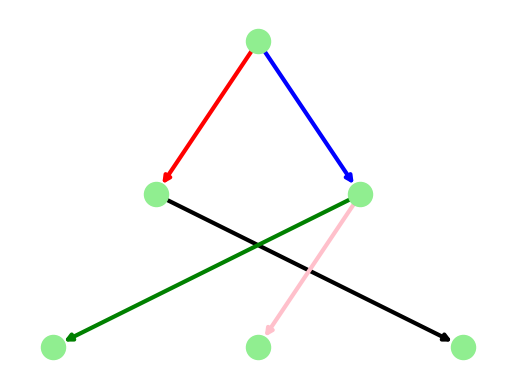

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

#pos = nx.kamada_kawai_layout(DG)
#pos = nx.planar_layout(DG)
#pos = nx.random_layout(DG)
#pos = nx.shell_layout(DG)
#pos = nx.spring_layout(DG)
#pos = nx.spectral_layout(DG)
pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')
#pos = nx.spring_layout(DG)

d = pos
y_vals = {v[1] for k, v in d.items()}
min_y, max_y = min(y_vals), max(y_vals)
pos = {k: 1 - ((v - min_y) / (max_y - min_y)) for k, v in d.items()}


DG[1][2]['color'] = 'red'
DG[1][3]['color'] = 'blue'
DG[3][4]['color'] = 'green'
DG[3][5]['color'] = 'pink'
DG[2][6]['color'] = 'black'

DG[1][2]['alpha'] = 0.5
DG[1][3]['alpha'] = 0.3
DG[3][4]['alpha'] = 0.9
DG[3][5]['alpha'] = 1
DG[2][6]['alpha'] = 0.3

w = 3
DG[1][2]['weight'] = w
DG[1][3]['weight'] = w
DG[3][4]['weight'] = w
DG[3][5]['weight'] = w
DG[2][6]['weight'] = w

colors = nx.get_edge_attributes(DG,'color').values()
alpha = nx.get_edge_attributes(DG,'alpha').values()
weight = nx.get_edge_attributes(DG,'weight').values()
#weights = nx.get_edge_attributes(DG,'weight').values()

"""
nx.draw(DG, pos, 
        edge_color=colors, 
 #       width=list(weights),
 #       with_labels=True,
        node_color='lightgreen')
"""
fig, ax = plt.subplots()
nx.draw(DG, pos, 
       edge_color=colors,
       ax=ax,
       #alpha=list(alpha),
       width=list(weight),
 #       width=list(weights),
 #       with_labels=True,
       node_color='lightgreen')

In [9]:
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [3]:
weight

dict_values([3, 3, 3, 3, 3])

AttributeError: 'list' object has no attribute 'get_array'

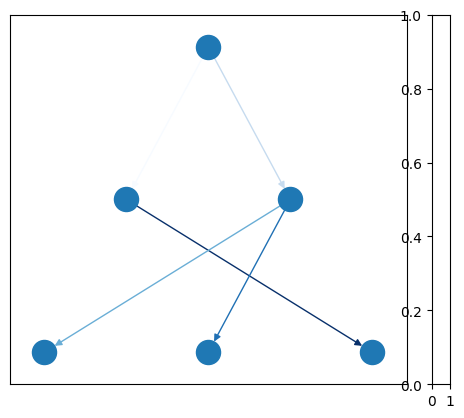

In [ ]:

fig, ax = plt.subplots()

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

#pos = nx.kamada_kawai_layout(DG)
#pos = nx.planar_layout(DG)
#pos = nx.random_layout(DG)
#pos = nx.shell_layout(DG)
#pos = nx.spring_layout(DG)
#pos = nx.spectral_layout(DG)
pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')
#pos = nx.spring_layout(DG)

d = pos
y_vals = {v[1] for k, v in d.items()}
min_y, max_y = min(y_vals), max(y_vals)
pos = {k: 1 - ((v - min_y) / (max_y - min_y)) for k, v in d.items()}

DG[1][2]['cmap'] = 1
DG[1][3]['cmap'] = 2
DG[3][4]['cmap'] = 3
DG[3][5]['cmap'] = 4
DG[2][6]['cmap'] = 5

edge_cmap=plt.cm.Blues
edge_cmap_2=plt.cm.Greens
color_cmap = nx.get_edge_attributes(DG,'cmap').values()
nodes = nx.draw_networkx_nodes(DG,pos, ax=ax)
edges = nx.draw_networkx_edges(DG,pos,edge_color=color_cmap,
                               edge_cmap=plt.cm.Blues, ax=ax)
plt.colorbar(edges, ax=ax)

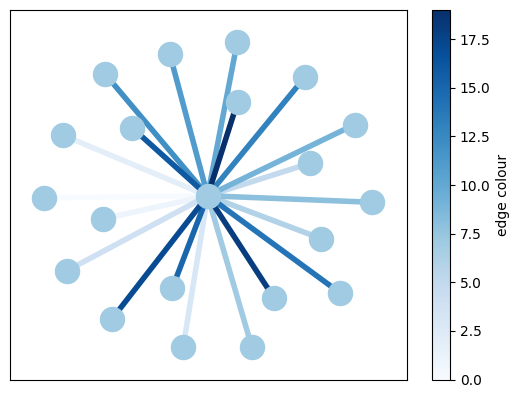

In [ ]:

G = nx.star_graph(20)
pos = nx.spring_layout(G, seed=63)  # Seed layout for reproducibility
colors = range(20)
options = {
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
}
e = nx.draw_networkx_edges(G, pos, **options)
options = {
    "node_color": "#A0CBE2",
}
n = nx.draw_networkx_nodes(G, pos, **options)

cbar = plt.colorbar(e)
cbar.ax.set_ylabel('edge colour', rotation=90)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a list of integers to map to colors
data = [1, 2, 3, 4, 5]

# Create a colormap from a list of colors

cmap=plt.cm.Blues

# Get a list of colors from the colormap
color_list = [cmap(x) for x in data]

# Convert the RGB values to hex codes
hex_list = [mcolors.rgb2hex(color) for color in color_list]

# Print the resulting list of hex codes
print(hex_list)

['#f6faff', '#f5fafe', '#f5f9fe', '#f4f9fe', '#f3f8fe']


In [ ]:
a = np.random.randint(3, size=(100))
b = np.random.randint(4, size=(100))

In [ ]:
import pandas as pd
data = pd.read_csv('/Users/benbarlow/dev/clustree/tests/data/input/iris.csv')

In [ ]:
cols = ['K1', 'K2', 'K3']

for cols[:-1]

#data[cols].groupby(['K1', 'K2']).size()[1]

['K1', 'K2']

In [ ]:
from collections import defaultdict

a = defaultdict(int)
a[1] += 3

In [ ]:
def base(k_upper: int):
    """Compute N x (N + 1) x (N + 2) for hasing

    Args:
        k_upper (int): Cluster resolution of lower layer.

    Returns:
        int: N x (N + 1) x (N + 2)
    """
    if k_upper < 1:
        return None
    k = k_upper - 1
    return int(k * (k + 1) * (k + 2) / 3)



8

In [ ]:
my_d = defaultdict(list)

my_d[1].append('a')

my_d
#d[1][2]["image"] = "a"

defaultdict(list, {1: ['a']})

In [ ]:
my_dict = defaultdict(dict)

my_dict[1]["samples"] = 75

In [ ]:
arr = np.random.randint(1, 4, size=(10, 3))
arr

array([[3, 2, 2],
       [2, 3, 1],
       [2, 2, 3],
       [3, 3, 1],
       [1, 3, 3],
       [3, 3, 2],
       [1, 2, 1],
       [1, 3, 3],
       [3, 1, 3],
       [1, 2, 2]])

In [27]:
file_path = '/Users/benbarlow/dev/clustree/tests/data/output/cfg_node_col_prefix'
da = plt.imread(file_path + ".png")

fig, ax = plt.subplots()
ax.imshow(da)
fig.suptitle('This is a somewhat long figure title', fontsize=6)
ax.axis("off")
plt.savefig(file_path + "_edited.png", dpi=200, bbox_inches="tight")
plt.close()
    

In [31]:
import matplotlib as mpl
isinstance(mpl.cm.Blues, mpl.colors.Colormap)

True

In [ ]:
from pairing_functions import szudzik
kk = 3
to_return = defaultdict(dict)
for k_upper in range(1, kk + 1):
    vals, counts = np.unique(arr[:,k_upper - 1], return_counts=True)
    for k_lower, cnt in zip(vals, counts):
        k_lower = int(k_lower)
        to_return[szudzik.pair(k_upper, k_lower)]["samples"] = int(cnt)

In [ ]:
iris = pd.read_csv('/Users/benbarlow/dev/clustree/tests/data/input/iris.csv')

In [ ]:
arr = np.random.randint(3, size=(100, 3))
arr

array([[0, 1, 1],
       [0, 0, 0],
       [0, 2, 2],
       [2, 1, 1],
       [1, 1, 2],
       [0, 0, 2],
       [2, 0, 1],
       [1, 2, 0],
       [0, 0, 0],
       [0, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 2, 1],
       [1, 2, 2],
       [1, 1, 2],
       [0, 1, 0],
       [1, 1, 1],
       [0, 2, 1],
       [2, 2, 1],
       [1, 2, 0],
       [0, 0, 0],
       [1, 2, 0],
       [2, 1, 1],
       [0, 0, 2],
       [1, 1, 1],
       [0, 2, 0],
       [0, 1, 1],
       [2, 2, 2],
       [1, 2, 0],
       [1, 2, 2],
       [1, 1, 1],
       [2, 1, 1],
       [2, 1, 0],
       [0, 1, 1],
       [1, 2, 0],
       [2, 0, 0],
       [2, 0, 1],
       [1, 0, 2],
       [1, 0, 2],
       [0, 0, 1],
       [1, 2, 1],
       [2, 2, 1],
       [2, 1, 1],
       [2, 2, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 2],
       [0, 2, 1],
       [1, 0, 2],
       [2, 0, 1],
       [1, 2, 2],
       [0, 1, 2],
       [0, 2, 0],
       [1, 1, 0],
       [2, 1, 0],
       [0,

In [ ]:
k_upper = 2
col = k_upper - 1

ind = arr[:, col] == 2
interest = arr[ind, col - 1]
vals, counts = np.unique(interest, return_counts=True)



(array([0, 1, 2]), array([12, 19,  9]))

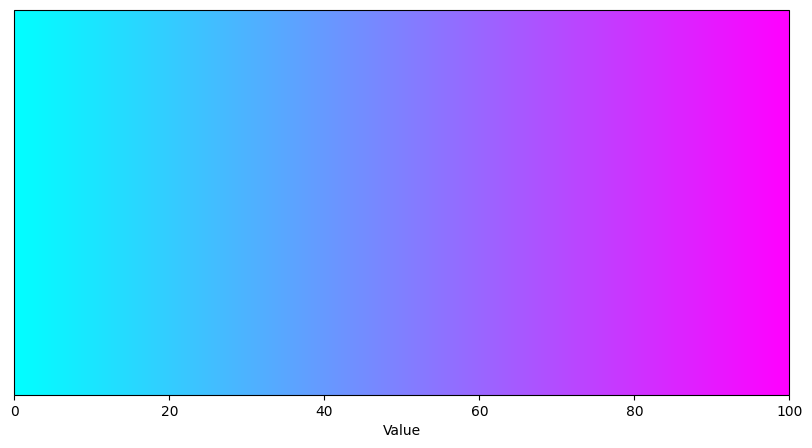

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 5))
#fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=100)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = fig.colorbar(
    sm,
    cax=ax,
    orientation='horizontal',
    label='Some Units'
)
cbar.set_label('Value')

/var/folders/7y/2xjb3t2n09d1ns7_wfm4kc4w0000gn/T/ipykernel_5185/151740164.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(
/var/folders/7y/2xjb3t2n09d1ns7_wfm4kc4w0000gn/T/ipykernel_5185/151740164.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(


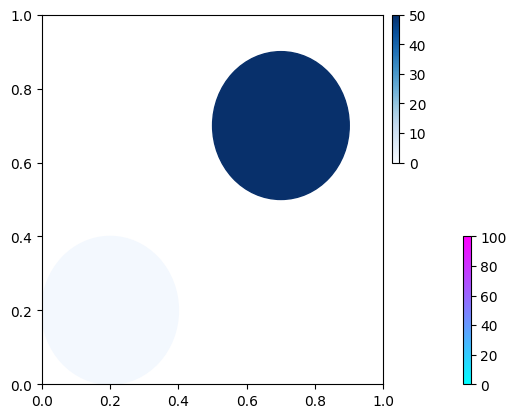

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)


# Add a circle at the top right of the image
circle = plt.Circle((0.2, 0.2), radius=0.2, fill=True, color=sm.to_rgba(1))
ax.add_artist(circle)

circle = plt.Circle((0.7, 0.7), radius=0.2, fill=True, color=sm.to_rgba(99))
ax.add_artist(circle)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=100)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(
    sm,
    location='right', 
    shrink=0.4,
    pad=0.02,
    anchor=(0, 0),
    panchor=(0,0)
)

cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=50)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(
    sm,
    location='right', 
    shrink=0.4,
    pad=0.02,
    anchor=(0, 1),
    panchor=(0.2,0)
)

#cbar.set_label('Value')


In [ ]:
type(cmap)

matplotlib.colors.LinearSegmentedColormap

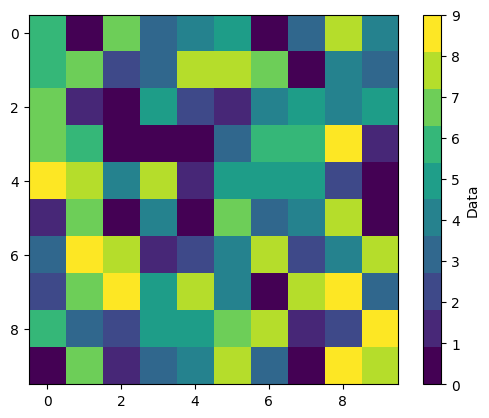

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Generate some example data
data = np.random.randint(0, 10, size=(10, 10))

# Define the color map
cmap = plt.cm.get_cmap('viridis', len(np.unique(data)))

# Normalize the data to range between 0 and 1
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

# Map the integers to colors using the color map
colors = [cmap(norm(d)) for d in data.flatten()]

# Reshape the color array to match the data shape
colors = np.array(colors).reshape(data.shape + (-1,))

# Plot the data with colors
fig, ax = plt.subplots()
im = ax.imshow(data, cmap=cmap, norm=norm)

# Create a colorbar to show the mapping of integers to colors
cbar = plt.colorbar(im)

# Set the label for the colorbar
cbar.set_label('Data')

# Show the plot
plt.show()


In [ ]:
import matplotlib.cm as cm

col  = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, location="right")


In [10]:
from clustree import clustree

help(clustree)

Help on function clustree in module clustree._graph:

clustree(data: Union[str, pathlib.Path, pandas.core.frame.DataFrame], prefix: str, images: Union[str, pathlib.Path], output_path: Union[str, pathlib.Path, NoneType] = None, draw: bool = True, node_color: str = 'prefix', node_color_aggr: Union[Callable, str, NoneType] = None, node_cmap: Union[matplotlib.colors.Colormap, str] = 'inferno', edge_color: str = 'samples', edge_cmap: Union[matplotlib.colors.Colormap, str] = 'viridis', orientation: Literal['vertical', 'horizontal'] = 'vertical', layout_reingold_tilford: bool = None, min_cluster_number: Literal[0, 1] = 1, border_size: float = 0.05, figsize: tuple = None, arrows: bool = None, node_size: float = 300, node_size_edge: Optional[float] = None, dpi: float = 500, kk: Optional[int] = None) -> networkx.classes.digraph.DiGraph
    Parameters
    ----------
    data : Union[Path, str]
        Path of csv or DataFrame object.
    prefix : str
        String indicating columns containing c

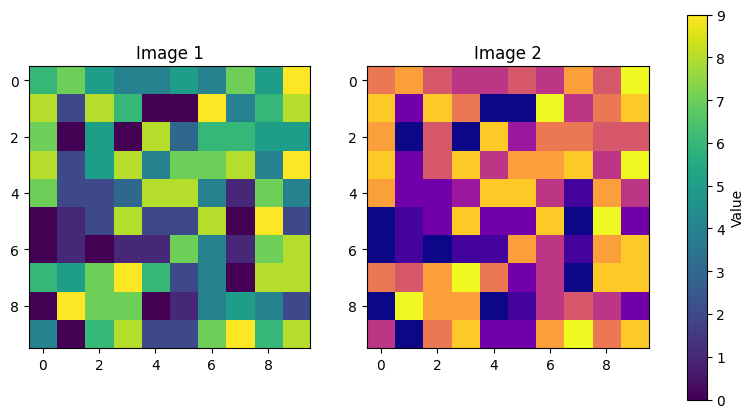

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example image data
img_data = np.random.randint(0, 10, size=(10, 10))

# Create a new figure and set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first image on the left subplot
ax1 = axes[0]
im1 = ax1.imshow(img_data, cmap='viridis')
ax1.set_title('Image 1')

# Plot the second image on the right subplot
ax2 = axes[1]
im2 = ax2.imshow(img_data, cmap='plasma')
ax2.set_title('Image 2')

# Add a colorbar to the figure
cbar = fig.colorbar(im1, ax=axes)
cbar.set_label('Value')

# Show the plot
plt.show()


In [ ]:
im1

In [ ]:
my_dict = {}
my_dict["A"] = 1
my_dict["A"]

1

In [ ]:
vals, counts

total = sum(counts)
for k_start, cnt in zip(vals, counts):
    alpha = cnt / total
    print(alpha)

0.3
0.3
0.4


(-1.185668730600345,
 1.1646970809281951,
 -1.2088458772449897,
 1.1978542319591785)

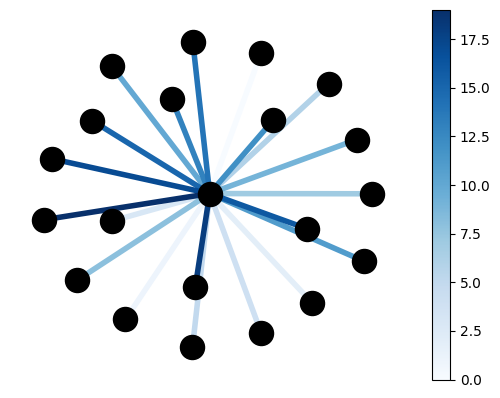

In [ ]:
G = nx.star_graph(20)  
pos = nx.spring_layout(G)
colors = range(20) 
nodes = nx.draw_networkx_nodes(G,pos,node_color='k')
edges = nx.draw_networkx_edges(G,pos,edge_color=colors,width=4,
                               edge_cmap=plt.cm.Blues)
plt.colorbar(edges)
plt.axis('off')


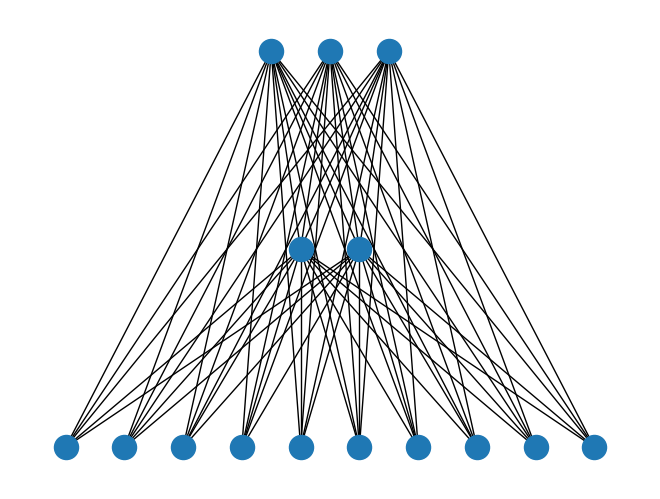

In [ ]:
G = nx.complete_multipartite_graph(10, 2, 3)
pos = nx.multipartite_layout(G, align='horizontal')
nx.draw(G, pos)

## Custom Icons

In [ ]:
import PIL

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper}
imgs = {
    key: PIL.Image.open(f'/Users/benbarlow/dev/clustree/tests/data/input/{key}.png')
    for key in ind
}

DG.nodes[1]['image'] = imgs['1_1']
DG.nodes[2]['image'] = imgs['2_1']
DG.nodes[3]['image'] = imgs['2_2']
DG.nodes[4]['image'] = imgs['3_1']
DG.nodes[5]['image'] = imgs['3_2']
DG.nodes[6]['image'] = imgs['3_3']

pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')

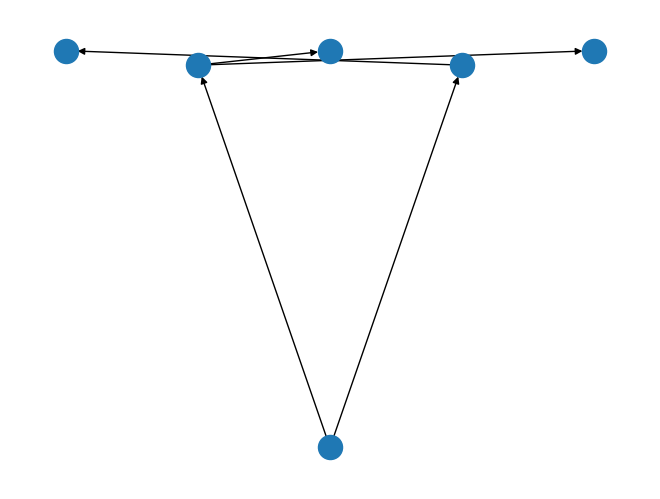

In [ ]:
# drawing responds to manual changes to pos - changes adjust distance between each layer
import copy
tmp_pos = copy.copy(pos)
tmp_pos[1][1] = -20
nx.draw(DG, tmp_pos)

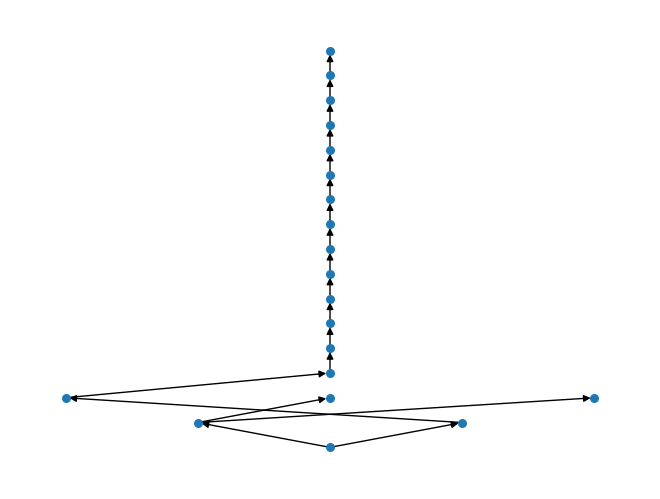

In [ ]:
import matplotlib.pyplot as plt

tmp_DG = copy.deepcopy(DG)
for i in range(6, 20):
    tmp_DG.add_edges_from([(i, i + 1)])
    tmp_DG.nodes[i + 1]['res'] = i - 2


tmp_pos = nx.multipartite_layout(tmp_DG, subset_key='res', align='horizontal')
nx.draw(tmp_DG, tmp_pos, node_size=30, width=1)

plt.box(False)

plt.savefig('tmp_graph.png')

AttributeError: 'Path' object has no attribute 'center'

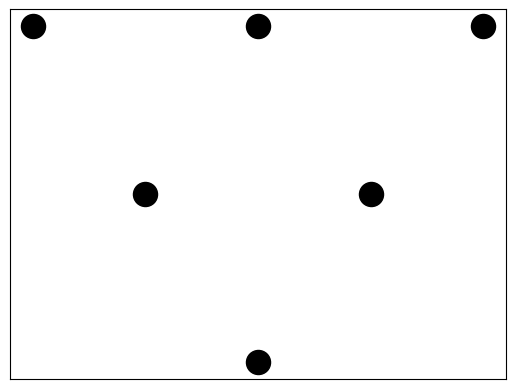

In [ ]:
fig, ax = plt.subplots()

nodes = nx.draw_networkx_nodes(
    DG,
    pos=pos,
    node_color='black',
    node_shape='o',
    ax=ax,
)

nodes.get_tightbbox()  # enclosing bounding box (in figure pixel coordinates)

nodes.get_window_extent()  # artist's bounding box in display space

#coords = nodes.properties()['offsets'].data
#ax.scatter(
#    x=coords[:, 0] + 1,
#    y=coords[:, 1]+ 1,
#    #cmap='blue'

#)
#plt.show()

#nodes.properties()['transforms']
nodes.properties()['paths'][0]

In [ ]:
imgs

{'3_2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 '2_1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 '3_3': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 '1_1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 '2_2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 '3_1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>}

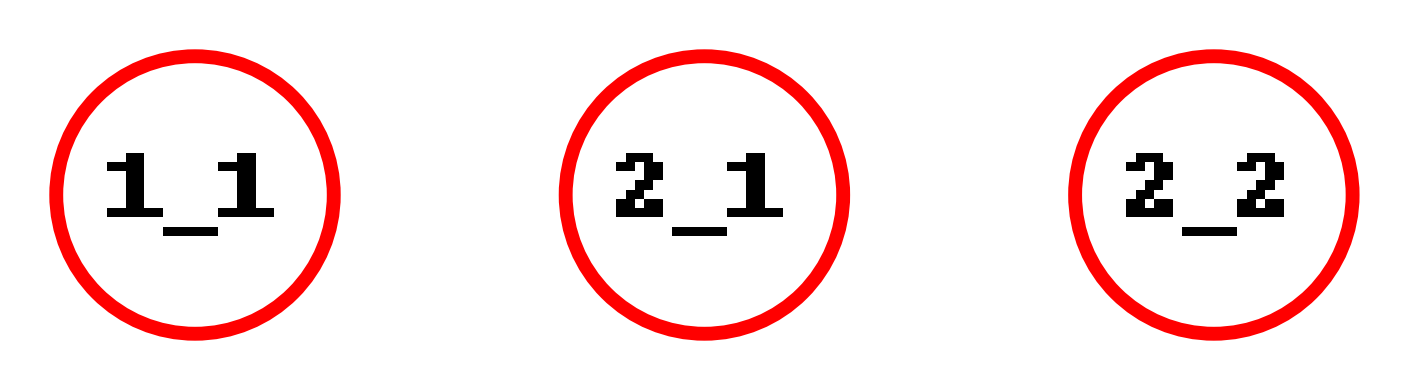

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# N PNG images
images = [imgs[k] for k in ['1_1', '2_1', '2_2']]

# N (x, y) coordinates
coords = [(100, 200), (300, 400), (500, 600)]

# N weightings
weights = [10, 20, 30]

# Create the figure and axis for the subplots
fig, axes = plt.subplots(1, len(images), figsize=(16, 4))

# Loop through each subplot and add the image and circle
for i, ax in enumerate(axes):
    # Load the image

    img = images[i]

    # Plot the image
    ax.imshow(img)

    # Plot the circle
    circle = plt.Circle((20, 20), 15, color='red', fill=False, linewidth=10)
    ax.add_artist(circle)

    # Set the axis limits
    ax.set_xlim(0, np.shape(img)[1])
    ax.set_ylim(np.shape(img)[0], 0)

    # Remove the axis labels and tick marks
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
np.shape(img)

(40, 40, 3)

In [ ]:
transform = nodes.get_transform()

In [ ]:
import matplotlib as mpl

backend = mpl.rcParams["backend"]


'module://matplotlib_inline.backend_inline'

In [ ]:
nodes.get_tightbbox()  # enclosing bounding box (in figure pixel coordinates)

nodes.get_window_extent()  # artist's bounding box in display space

coords = nodes.properties()['offsets'].data
ax.scatter(
    x=coords[:, 0],
    y=coords[:, 1],
    #cmap='blue'
)

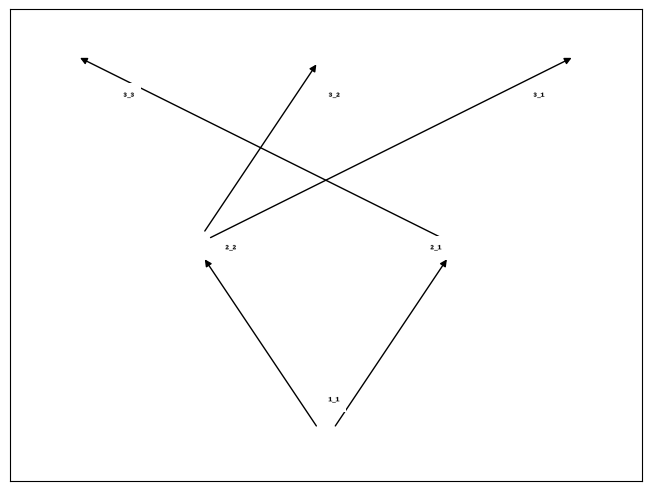

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sz = 15
fig, ax = plt.subplots(
    #figsize=(sz, sz)
    layout="constrained"
)
ax_range = ax.get_xlim()[1] - ax.get_xlim()[0]

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`

nx.draw_networkx_edges(
    DG,
    pos=pos,
    ax=ax,
    #arrows=True,
    #arrowstyle="-",
    node_shape='o',
    #min_source_margin=15,
    #min_target_margin=15,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = ax_range * 0.05
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in DG.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    
    a.imshow(DG.nodes[n]["image"])

    xlim, ylim = a.get_xlim(), a.get_ylim()

    # Create the circle patch
    #circle = patches.Circle(xy=((xlim[1]-xlim[0])/2, (ylim[1]-ylim[0])/2), radius=(xlim[1]-xlim[0])/2, fill=False)

    # Add the circle patch to the axis
    #a.add_patch(circle)

    # Set the axis limits to match the size of the image
    # does nothing: x and ylim are the same for every axis a
    #a.set_xlim(xlim)
    #a.set_ylim(ylim)
   
    a.axis("off")
plt.show()

In [ ]:
xlim

(-0.5, 39.5)

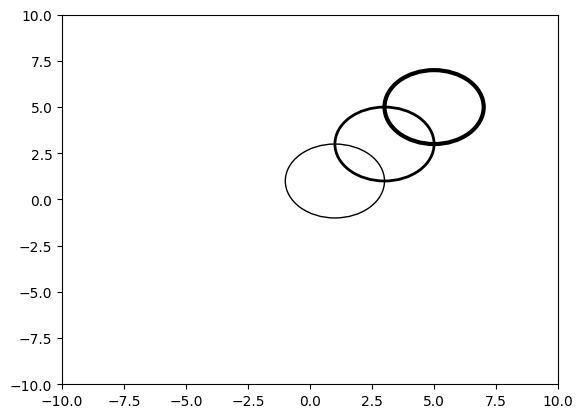

In [ ]:
import matplotlib.pyplot as plt

def draw_circles(coordinates, weights, radius):
    fig, ax = plt.subplots()

    for i in range(len(coordinates)):
        circle = plt.Circle(coordinates[i], radius=radius, fill=False, linewidth=weights[i])
        ax.add_artist(circle)

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    plt.show()

coordinates = [(1, 1), (3, 3), (5, 5)]
weights = [1, 2, 3]
radius = 2
draw_circles(coordinates, weights, radius)


In [ ]:
for u, d in DG.nodes(data=True):
    print(d)

{'res': 1, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x1099E52E0>}
{'res': 2, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x11A4EBF40>}
{'res': 2, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x1099E5970>}
{'res': 3, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x11A5F6520>}
{'res': 3, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x1099C2820>}
{'res': 3, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40 at 0x1099E5580>}


AttributeError: shape

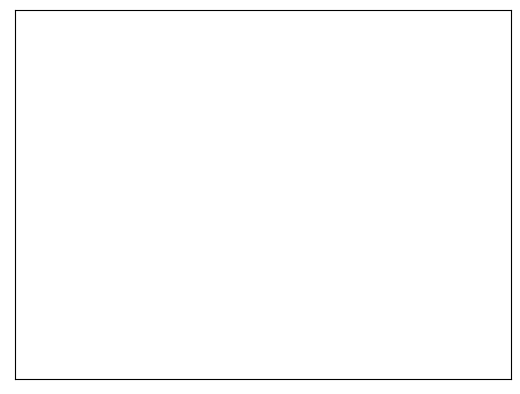

In [ ]:
sizes = {f'{k_upper}_{k_lower}': 10 for k_upper in range(3) for k_lower in range(3) if k_lower <= k_upper}
centers = []

fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

for id, node in DG.nodes(data=True):
    image = node['image']
    image_height, image_width, _ = image.shape
    aspect_ratio = image_height / image_width
    image_width = sizes[id]
    image_height = aspect_ratio * image_width
    extent = pos[id][0] - image_width / 2, pos[id][0] + image_width / 2, \
                pos[id][1] - image_height / 2, pos[id][1] + image_height / 2
    ax.imshow(image, extent=extent, aspect='equal')

plt.show()

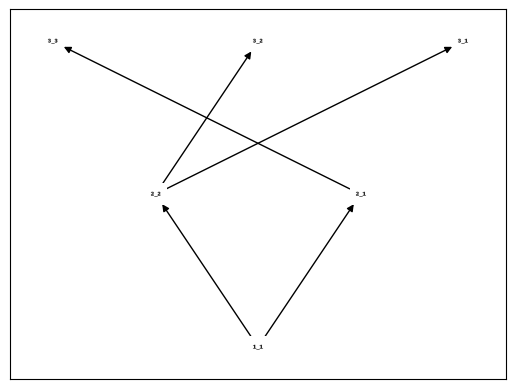

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# creates a figure and its axes to plot the graph on.
fig, ax = plt.subplots()

# plots the edges of the graph
# uses positions specified by pos
nx.draw_networkx_edges(
    DG,
    pos=pos,
    ax=ax,
)

# store the transformations for converting between
tr_figure = ax.transData.transform # data and figure coordinates
tr_axes = fig.transFigure.inverted().transform # between data and axes coordinates

# stores the size of the icons to be plotted, calculated as 2.5% of the x-axis limit range
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025

# half of icon size
icon_center = icon_size / 2.0

for n in DG.nodes: # iterare over nodes
    # computes the node's 
    xf, yf = tr_figure(pos[n])  # x and y figure coordinates
    xa, ya = tr_axes((xf, yf))  # x and y axes coordinates
    # create new matplotlib axes
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    # display image on axis a
    a.imshow(DG.nodes[n]["image"])
    # turn off the axis for the new axes
    a.axis("off")
plt.show()

In [8]:
list(DG.nodes)

[2, 1, 3, 4]

## Position Algorithm

This implementation takes as input a list of nodes and a list of edges, and returns a dictionary mapping each node to its position. The algorithm uses a recursive function, layout, to position each node based on the positions of its children. The algorithm starts by positioning the root node, and then calls layout recursively for each child of the root node. The positions of the nodes are shifted so that the leftmost node is at x = 0.

In [ ]:
import math

def reingold_tilford(nodes, edges):
    # Create a dictionary to store the parent of each node
    parent = {node: None for node in nodes}
    # Create a dictionary to store the children of each node
    children = {node: [] for node in nodes}
    # Fill the parent and children dictionaries based on the edges
    for edge in edges:
        parent[edge[1]] = edge[0]
        children[edge[0]].append(edge[1])
    # Initialize the positions of the nodes
    pos = {node: (0, 0) for node in nodes}
    # Recursively position the nodes
    def layout(node, depth):
        nonlocal pos
        # If the node has no children, return
        if not children[node]:
            return
        # Calculate the y position of the node based on its depth
        y = depth * 50
        # Calculate the x position of the node based on the positions of its children
        x = sum(pos[child][0] for child in children[node]) / len(children[node])
        # Set the position of the node
        pos[node] = (x, y)
        # Recursively position the children
        for child in children[node]:
            layout(child, depth + 1)
    # Find the root node (the node with no parent)
    root = [node for node in nodes if parent[node] is None][0]
    # Position the root node
    pos[root] = (0, 0)
    # Recursively position the rest of the nodes
    for child in children[root]:
        layout(child, 1)
    # Shift the nodes so that the leftmost node is at x = 0
    min_x = min(x for x, y in pos.values())
    for node in pos:
        pos[node] = (pos[node][0] - min_x, pos[node][1])
    # Return the positions
    return pos


## Dev

In [ ]:
import numpy as np

res_from = np.random.randint(1, 3, 1000)
res_to = np.random.randint(1, 4, 10000)


In [ ]:
def cart_prod(x, y):
    return np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

In [ ]:
list(set([(t, f) for t in res_to for f in res_from]))

[(1, 2), (2, 1), (3, 1), (1, 1), (2, 2), (3, 2)]

In [ ]:
['K1', 'K2', 'K3']

for i in range(3):
    print(i)

0
1
2


In [ ]:
s = {}

if s:
    print(1)

In [ ]:
ls = ['K1', 'K2', 'K3', 'K5']

# all(a == b for a consecutive for b in ls_as_int)

In [ ]:
num_1 = [f'1_{ele}' for ele in [1, 1, 1, 1, 1]]
num_2 = [f'2_{ele}' for ele in [1, 2, 2, 1, 1]]
num_3 = [f'3_{ele}' for ele in [1, 2, 3, 1, 1]]

In [ ]:
num_1 = [f'1_{ele}' for ele in [1, 1, 1]]
num_2 = [f'2_{ele}' for ele in [1, 2, 2]]
num_3 = [f'3_{ele}' for ele in [1, 2, 3]]

In [ ]:
from networkx import DiGraph
from typing import Union, Set, List

def add_layer(
    k_upper: int, prev_cluster: Union[List[str], None], cluster: List[str], dg: DiGraph
):
    if k_upper == 1:
        dg.add_node("1_1")
    else:
        add_edges(prev_cluster=prev_cluster, cluster=cluster, dg=dg)  # might add dg=
    set_res(k_upper=k_upper, to_set=set(cluster), dg=dg)


def add_edges(prev_cluster: List[str], cluster: List[str], dg: DiGraph):
    print(cluster)
    print(prev_cluster)
    edges_to_add = list(set([(pc, c) for pc, c in zip(prev_cluster, cluster)]))
    print(edges_to_add)
    dg.add_edges_from(edges_to_add)


def set_res(k_upper: int, to_set: Set[str], dg: DiGraph):
    for node in to_set:
        dg.nodes[node]["res"] = k_upper


In [ ]:
dg = DiGraph()

prev_cluster = None
cluster = num_1
k_upper = 1
add_layer(k_upper=k_upper, prev_cluster=prev_cluster, cluster=cluster, dg=dg)

prev_cluster = num_1
cluster = num_2
k_upper = 2
add_layer(k_upper=k_upper, prev_cluster=prev_cluster, cluster=cluster, dg=dg)

prev_cluster = num_2
cluster = num_3
k_upper = 3
add_layer(k_upper=k_upper, prev_cluster=prev_cluster, cluster=cluster, dg=dg)


['2_1', '2_2', '2_2']
['1_1', '1_1', '1_1']
[('1_1', '2_1'), ('1_1', '2_2')]
['3_1', '3_2', '3_3']
['2_1', '2_2', '2_2']
[('2_1', '3_1'), ('2_2', '3_2'), ('2_2', '3_3')]


In [ ]:
dg.number_of_edges()

5

NetworkXError: Node '1_1' has no position.

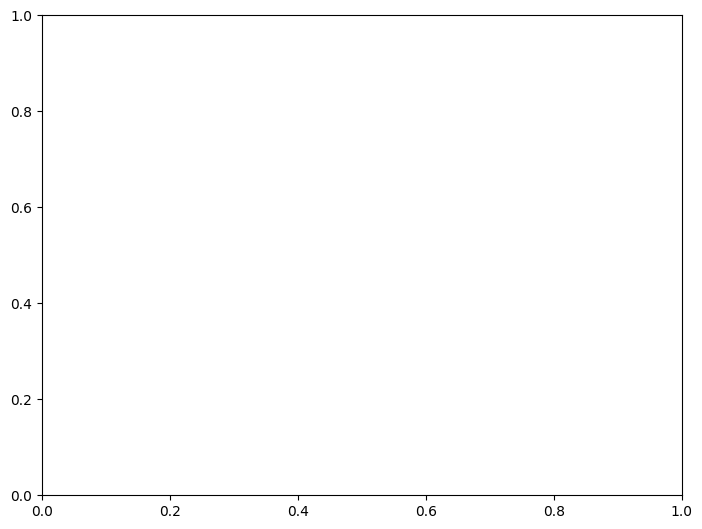

In [ ]:
import networkx as nx

#pos = nx.multipartite_layout(dg, subset_key='res', align='horizontal')
nx.draw(dg, pos)

In [ ]:
import numpy as np

k_upper_is_1 = np.repeat(1, 150)
k_upper_is_2 = np.concatenate([np.repeat(1, 70), np.repeat(2, 80)])
k_upper_is_3 = np.concatenate([np.repeat(1, 45), np.repeat(2, 45), np.repeat(3, 60)])

## Understand pixels

In [9]:
import PIL

ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper}
imgs = {
    key: PIL.Image.open(f'/Users/benbarlow/dev/clustree/tests/data/input/{key}.png')
    for key in ind
}

Figure size in pixels: 300.0 x 200.0
[4.0, 6.0, 6.0, 8.0]


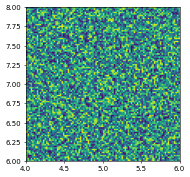

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array for the image
image = np.random.rand(100, 100)

# Create a figure with a specified size and dpi
fig = plt.figure(figsize=(6, 4), dpi=50)

# Determine the number of pixels in the figure
width, height = fig.get_size_inches() * fig.get_dpi()
print(f"Figure size in pixels: {width} x {height}")

# Convert pixel coordinates to data coordinates
left = 200 / fig.dpi
right = (200 + image.shape[1]) / fig.dpi
bottom = 300 / fig.dpi
top = (300 + image.shape[0]) / fig.dpi


# Plot the image at pixel coordinates (200, 300)
extent=[left, right, bottom, top]
print(extent)
plt.imshow(image, extent=extent)

# Show the plot
plt.show()


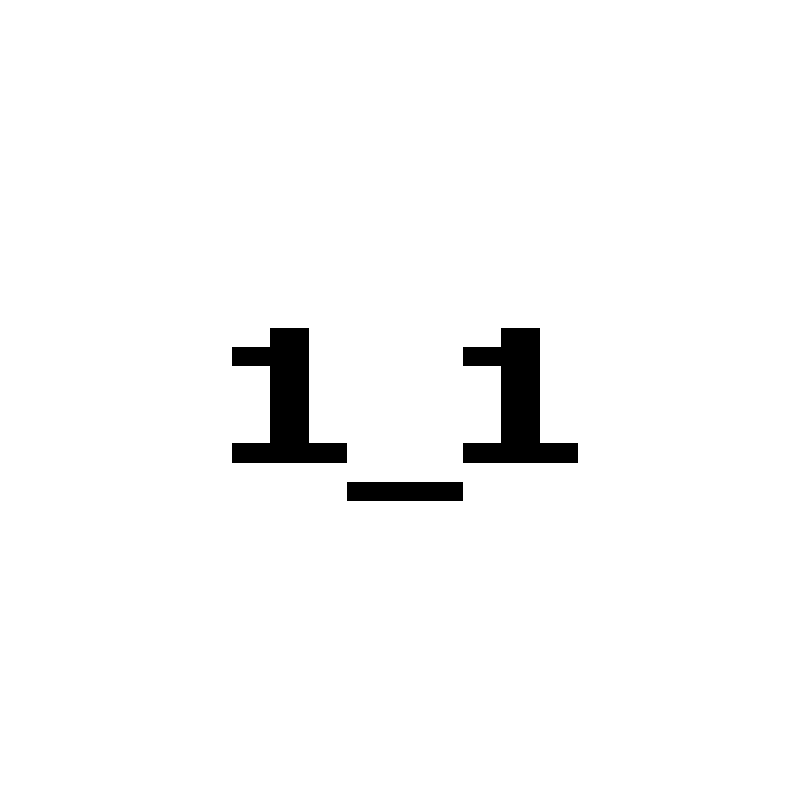

In [151]:
import matplotlib.pyplot as plt
import matplotlib as mpl

node_width = 0.1

# image has (x_size * dpi) by (y_size * dpi) pixels, e.g. plt.subplots(figsize=(10, 10), dpi=200) has 2000 x 2000 pixels
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
ax.patch.set_visible(False)
ax.axis("off")

ax.imshow(imgs['1_1'], extent=[0, node_width, 0, node_width])

[[ 250.  220.]
 [ 250. 1760.]
 [1800.  220.]
 [1800. 1760.]]
[[ 250.   220. ]
 [ 250.  1760. ]
 [1536.5  220. ]
 [1536.5 1760. ]]


/var/folders/7y/2xjb3t2n09d1ns7_wfm4kc4w0000gn/T/ipykernel_4063/2647226584.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(


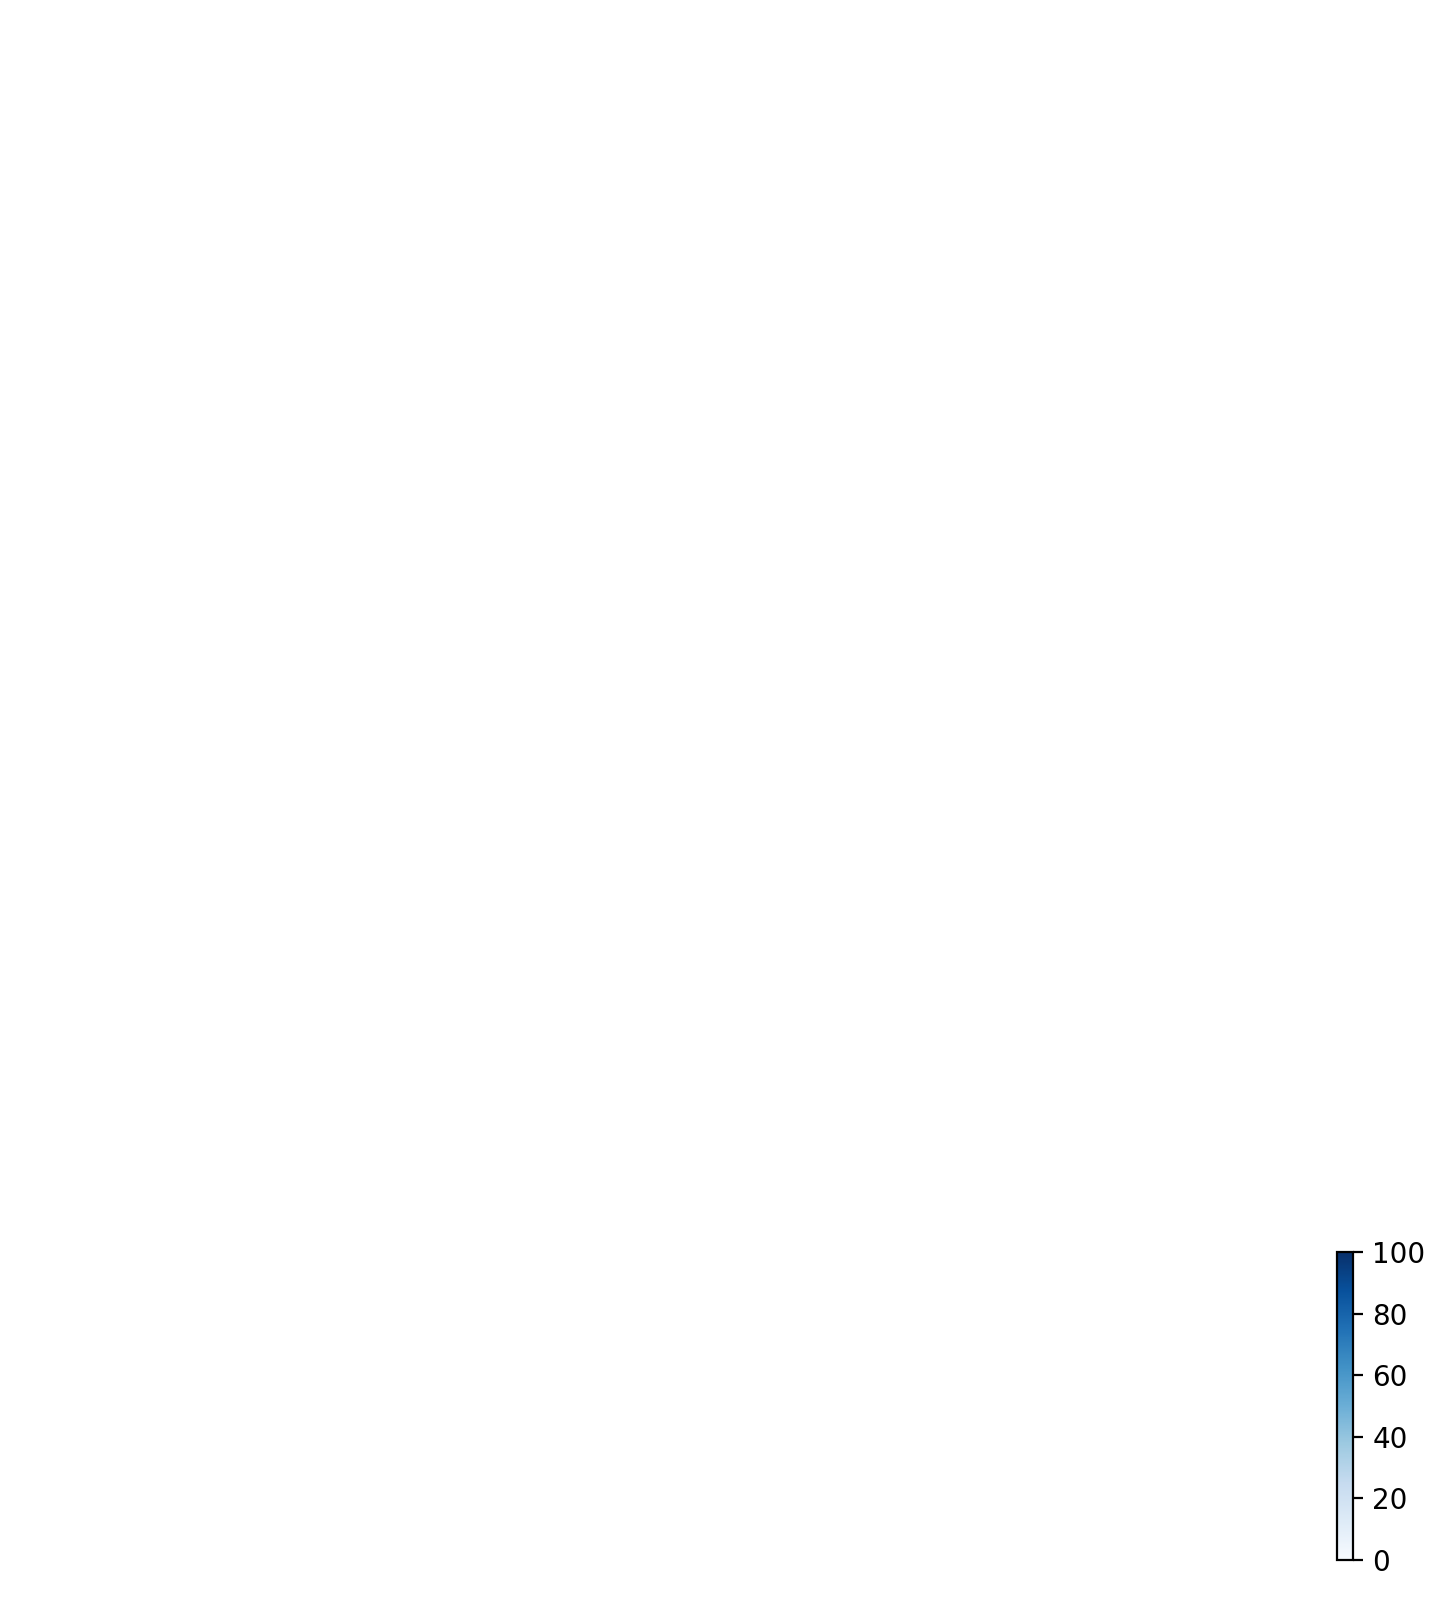

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl

node_width = 64
kk = 20
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=100)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# image has (x_size * dpi) by (y_size * dpi) pixels, e.g. plt.subplots(figsize=(10, 10), dpi=200) has 2000 x 2000 pixels
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
ax.patch.set_visible(False)
ax.axis("off")

exte = ax.get_window_extent()
#bbox = exte.transformed(fig.dpi_scale_trans.inverted())
#width, height = bbox.width, bbox.height
#x0, y0, width, height = exte.bounds
print(exte.corners())

cbar = fig.colorbar(
    sm,
    location='right', 
    shrink=0.2,
    pad=0.02,
    anchor=(0, 0),
    panchor=(0,0)
)

print(exte.corners())


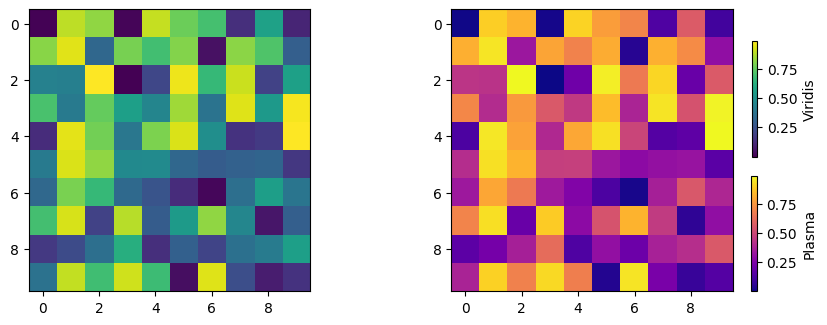

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with two axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data for each axis
im1 = axs[0].imshow(data, cmap='viridis')
im2 = axs[1].imshow(data, cmap='plasma')

# Create colorbars for each axis
cbar1 = fig.colorbar(im1, ax=axs[0], anchor=(9, 0.5), panchor=(0,0), shrink=0.3)
cbar2 = fig.colorbar(im2, ax=axs[1], anchor=(0, 0), panchor=(0,0), shrink=0.3)

# Set the label for each colorbar
cbar1.set_label('Viridis')
cbar2.set_label('Plasma')

# Show the figure
plt.show()



* `fraction`: float, default: 0.15, Fraction of original axes to use for colorbar.

* `shrink` float, default: 1.0, Fraction by which to multiply the size of the colorbar.
* `aspectfloat`, default: 20, Ratio of long to short dimensions.
* `padfloat`, default: 0.05 if vertical, 0.15 if horizontal, Fraction of original axes between colorbar and new image axes.
* `anchor` (float, float), optional, The anchor point of the colorbar axes. Defaults to (0.0, 0.5) if vertical; (0.5, 1.0) if horizontal.
* `panchor` (float, float), or False, optional, The anchor point of the colorbar parent axes. If False, the parent axes' anchor will be unchanged. Defaults to (1.0, 0.5) if vertical; (0.5, 0.0) if horizontal.

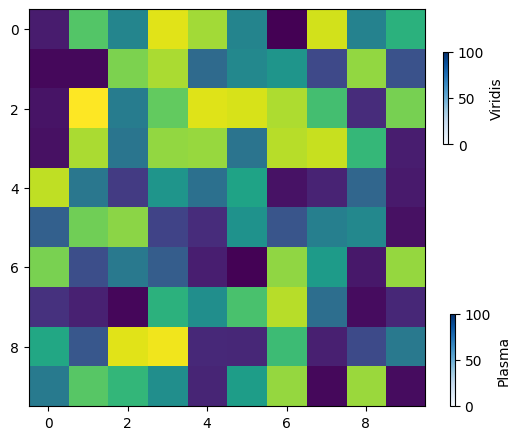

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with two axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the data for each axis
ax.imshow(data, cmap='viridis')

# Create colorbars for each axis
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=100)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar1 = fig.colorbar(sm, ax=ax, anchor=(-1.27, 0.5), panchor=(0,0), shrink=0.15)
cbar2 = fig.colorbar(sm, ax=ax, anchor=(0, 0), panchor=(0,0), shrink=0.15)

# Set the label for each colorbar
cbar1.set_label('Viridis')
cbar2.set_label('Plasma')

# Show the figure
plt.show()

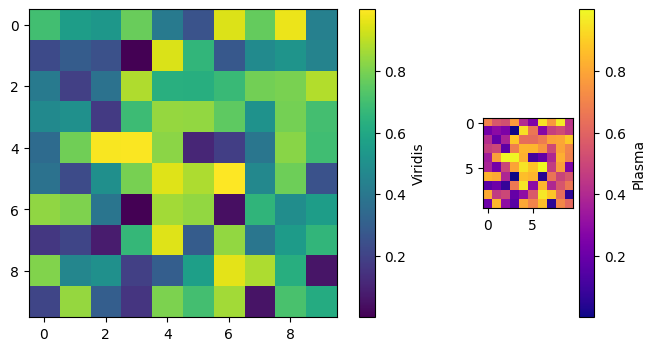

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with two axes and place colorbars at the right-hand side
fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [4, 1]})

# Plot the data for each axis
im1 = axs[0].imshow(data, cmap='viridis')
im2 = axs[1].imshow(data, cmap='plasma')

# Create colorbars for each axis
cbar1 = fig.colorbar(im1, ax=axs[0], location='right')
cbar2 = fig.colorbar(im2, ax=axs[1], location='right')

# Set the label for each colorbar
cbar1.set_label('Viridis')
cbar2.set_label('Plasma')

# Show the figure
plt.show()


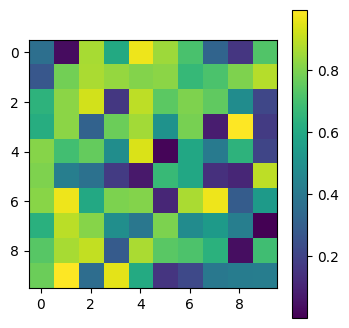

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with a single Axes object
fig, ax = plt.subplots(figsize=(4,4))

# Plot the data on the Axes object
im = ax.imshow(data, cmap='viridis')

# Add a colorbar to the figure
cbar = fig.colorbar(im)

# Show the figure
plt.show()

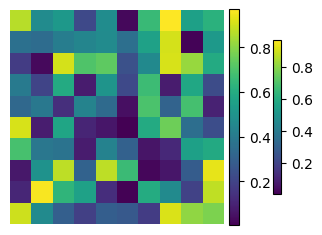

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with a single Axes object
fig, ax = plt.subplots(figsize=(4,4))

# Plot the data on the Axes object
im = ax.imshow(data, cmap='viridis')

# Add a colorbar to the figure, with custom parameters
cbar = fig.colorbar(
    im,
    ax=ax,
    pad=0.02,
    shrink=0.5,
    aspect=20,  # changes width of colorbar, and therefore, width of final output. Does not change width of plotting axes
    anchor=(0, 0.5)
)

cbar2 = fig.colorbar(
    im,
    ax=ax,
    pad=0.02,
    shrink=0.7,
    aspect=20,  # changes width of colorbar, and therefore, width of final output. Does not change width of plotting axes
    anchor=(0.0, 0.5)
)


ax.axis("off")

# Show the figure
plt.show()



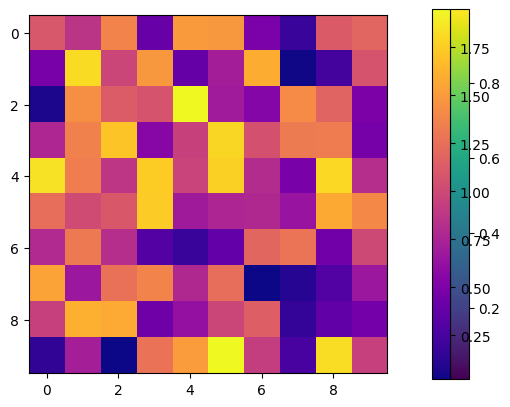

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10) * 2

# Create a figure with a single Axes object
fig, ax = plt.subplots()

# Plot the first data on the Axes object with a viridis colormap
im1 = ax.imshow(data1, cmap='viridis')

# Plot the second data on the Axes object with a plasma colormap
im2 = ax.imshow(data2, cmap='plasma')

# Create a colorbar for the first data, anchored to the left-hand side of the Axes
cbar1 = fig.colorbar(im1, ax=ax,
                    anchor=(0, 0.5),
                    pad=0.0,
                    panchor=(-1, 0.5))

# Create a colorbar for the second data, anchored to the right-hand side of the Axes
cbar2 = fig.colorbar(im2, ax=ax,
                    anchor=(1, 0.5),
                    pad=0.0,
                    #panchor=(1, 0.5)
                    panchor=False
                    )

# Show the figure
plt.show()


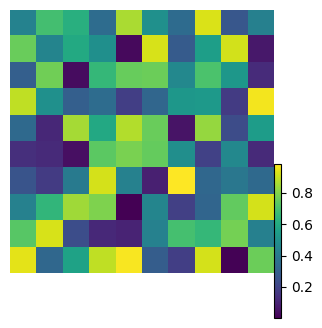

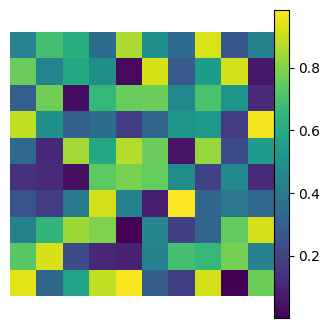

In [147]:

# Generate some sample data
data = np.random.rand(10, 10)

# Create a figure with a single Axes object
fig, ax = plt.subplots(figsize=(4,4))

# Plot the data on the Axes object
im = ax.imshow(data, cmap='viridis')

# Add a colorbar to the figure, with custom parameters
cbar = fig.colorbar(
    im,
    ax=ax,
    pad=0.0,
    shrink=0.5,
    aspect=20,  # changes width of colorbar, and therefore, width of final output. Does not change width of plotting axes
    anchor=(0, 0),
    panchor=(5,1)
)

ax.axis("off")

# Show the figure
plt.show()

fig, ax = plt.subplots(figsize=(4,4))

# Plot the data on the Axes object
im = ax.imshow(data, cmap='viridis')

# Add a colorbar to the figure, with custom parameters
cbar = fig.colorbar(
    im,
    ax=ax,
    pad=0.0,
    shrink=1,
    aspect=20,  # changes width of colorbar, and therefore, width of final output. Does not change width of plotting axes
    anchor=(0, 0.5),
    panchor=(,1)
    #panchor=(0,0)
)

ax.axis("off")

# Show the figure
plt.show()

In [59]:
for n in DG.nodes():
    print(n)

2
1
3
4


<Axes: >

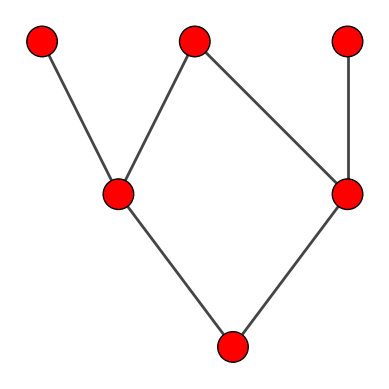

In [57]:
import igraph as ig
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

g = ig.Graph()


g.add_vertices(n=[3, 7, 8, 13, 14, 15])

def name_to_id(name, g):
    return g.vs.find(name=name).index

ls = [(3, 7), (3, 8), (7, 13), (7, 14), (8, 14), (8, 15)]
ls_as_id = [
    (name_to_id(name=node_from, g=g), name_to_id(name=node_to, g=g))
    for node_from, node_to in ls
]
g.add_edges(ls_as_id)
#g.add_edges([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])
#g.add_edges([(0, 1), (0, 2), (2, 3), (2, 4), (1, 5)])

layout = g.layout_reingold_tilford(root=[0])

ig.plot(g, layout=layout, target=ax)
#
# g.get_vertex_dataframe()

In [58]:
layout.coords

[[0.0, 0.0],
 [-0.75, 1.0],
 [0.75, 1.0],
 [-1.25, 2.0],
 [-0.25, 2.0],
 [0.75, 2.0]]

In [61]:
for n, v in DG.nodes.items():
    print(n)
    print(v)

2
{}
1
{}
3
{}
4
{}


In [2]:
import pandas as pd
data = pd.read_csv("/Users/benbarlow/dev/clustree/tests/data/output/time/output.csv")

In [8]:
data.tail()

,Key,Value
6,8,0.360634
7,9,0.459990
8,10,0.629526
9,11,0.998010
10,12,3.520738


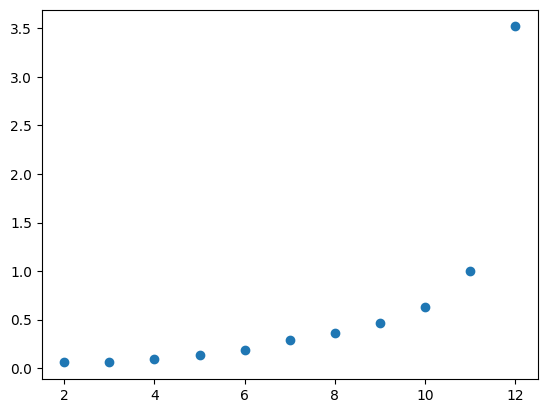

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/Users/benbarlow/dev/clustree/tests/data/output/time/output.csv")

# plot the data as a scatter plot
plt.scatter(data['Key'], data['Value'])


In [1]:
path = '/Users/benbarlow/dev/clustree/tests/data/input/2_2.png'

import cv2
import matplotlib.image as mpimg
import time

N = 50

start = time.time()
for i in range(N):
    cv2.imread(path)
print(time.time() - start)

start = time.time()
for i in range(N):
    img = mpimg.imread(path)
print(time.time() - start)

0.0018129348754882812
0.011559009552001953


(0.0, 924.0, 0.0, 440.0)

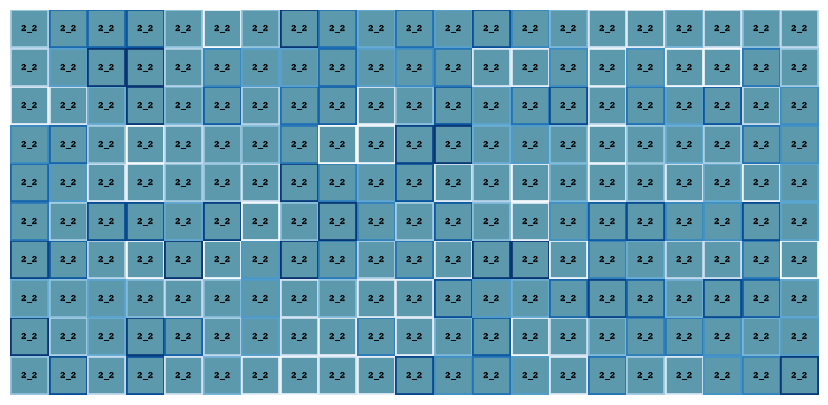

In [45]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def get_extent(bl_anchor, length):
    return [bl_anchor[0], bl_anchor[0] + length, bl_anchor[1], bl_anchor[1] + length]

def get_circle_centre(
    radius: float,
    bl_anchor: tuple[float, float],
    length: float,
) -> tuple[float, float]:
    l, b = bl_anchor
    r, t = l + length, b + length
    return (r - radius, t - radius)

length = 44

cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=40, vmax=110)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
# Read the image
img = cv2.imread(path)

# Set the border width in pixels
N = 2
# Add the border
fig, ax = plt.subplots(figsize=(15,5))

radius = 5

# Display the original and bordered images
for i in range(21):
    for j in range(10):
        col_val = sm.to_rgba(np.random.randint(40, 110))
        col_val = tuple(val * 255 for val in col_val)
        img_with_border = cv2.copyMakeBorder(img, N, N, N, N, cv2.BORDER_CONSTANT, value=col_val)
        bl_anchor = (i * length, j * length)
        ax.imshow(img_with_border, extent=get_extent(bl_anchor=bl_anchor, length=length))
        #circle = plt.Circle(
        #    get_circle_centre(radius=radius, bl_anchor=bl_anchor, length=length),
        #    radius=radius,
        #    fill=True,
        #    color='red',
        #)
        #ax.add_artist(circle)

ax.autoscale()

ax.axis("off")

In [50]:
mpl.colors.to_rgba('red')

(1.0, 0.0, 0.0, 1.0)

In [46]:
get_fig_info("pixels")

Number of pixels: 640 x 480


<Figure size 640x480 with 0 Axes>

In [37]:
def get_pixels(fig):
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    pixels_width, pixels_height = int(width * dpi), int(height * dpi)
    print(f"Number of pixels: {pixels_width} x {pixels_height}")

def get_dpi(fig):
    dpi = fig.get_dpi()
    print(f"Figure dpi: {dpi}")

def get_size(fig):
    width, height = fig.get_size_inches()
    print(f"Figure size: {width} x {height} inches")

def get_fig_info(info, fig=None):
    if not fig:
        fig = plt.gcf()
    if info == "pixels":
        get_pixels(fig)
    elif info == "size":
        get_size(fig)
    elif info == "dpi":
        get_dpi(fig)

In [47]:
def get_iterator(main_list, M):
    for i in range(0, len(main_list), M):
        yield main_list[i:i+M]


In [49]:
for small_ls in get_iterator(main_list=[1, 2, 3, 4, 5, 6,  7, 8, 9], M=3):
    print(small_ls)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [51]:
import igraph as ig
import random

def generate_tree(depth):
    # Initialize an empty graph
    g = ig.Graph()

    # Add the root node
    g.add_vertex(0)

    # Recursive function to add child nodes
    def add_children(parent, depth):
        if depth == 0:
            return

        # Choose a random number of children for the current node
        n_children = random.randint(1, 3)

        # Add the child nodes and edges
        for i in range(n_children):
            child_id = len(g.vs)
            g.add_vertex(child_id)
            g.add_edge(parent, child_id)

            # Recursively add children to the new node
            add_children(child_id, depth-1)

    # Call the recursive function to generate the tree
    add_children(0, depth)

    return g


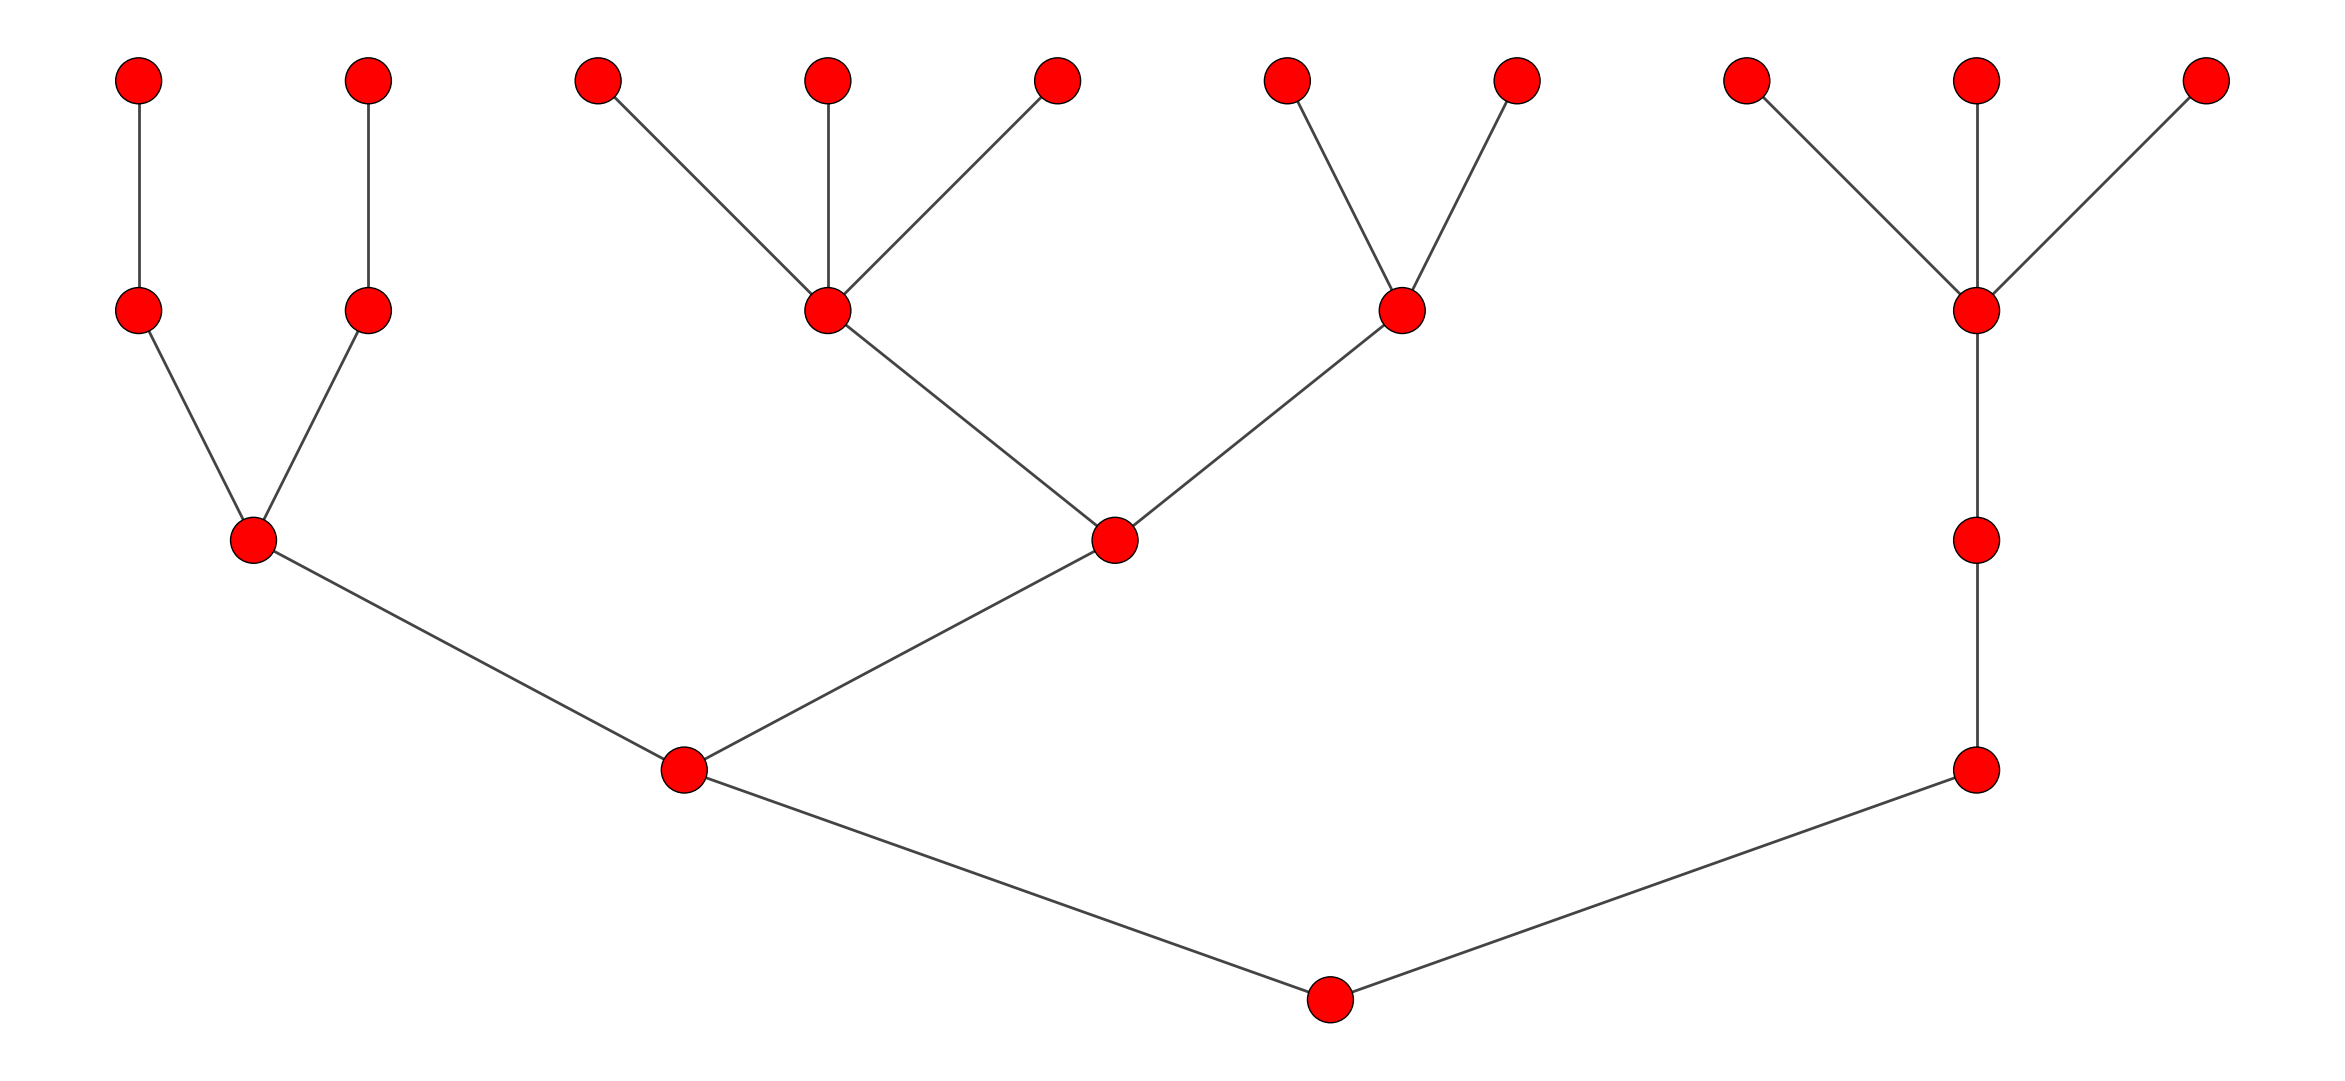

In [92]:
for n in range(1):
    g = generate_tree(np.random.randint(4, 12))
    layout = g.layout_reingold_tilford(root=[0])
    leaf_x_coord = np.asarray([ele[0] for ele in layout.coords if ele[1] == 4.0])
    
    
    fig, ax = plt.subplots(figsize=(30,20))
    ig.plot(g, layout=layout, target=ax)

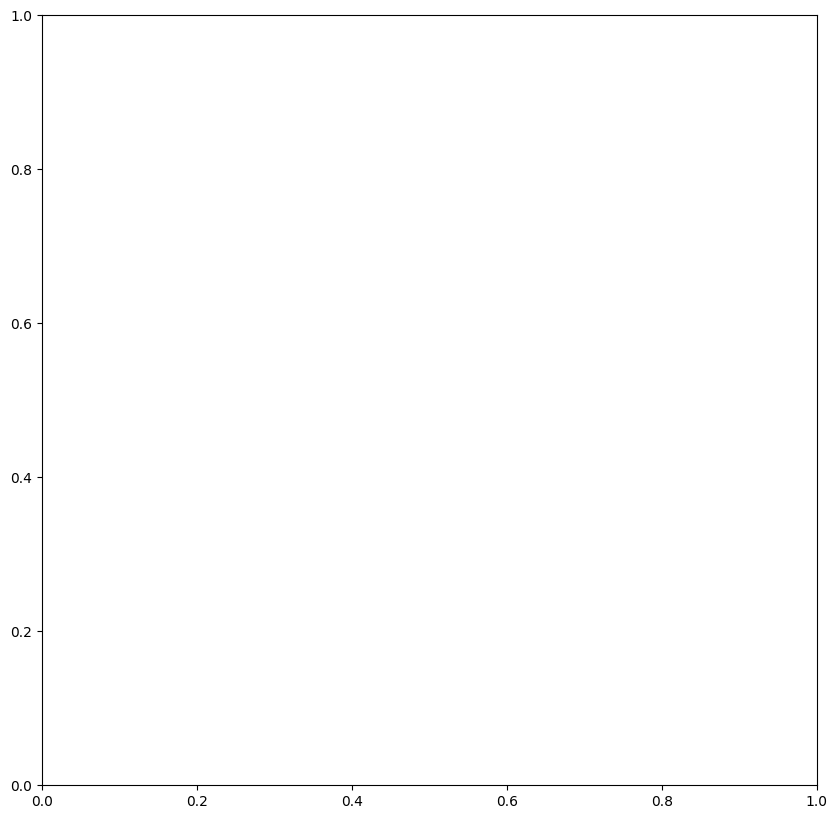

In [117]:
imgs = [img for _ in range(10)]
x_pos = list(range(10))
y_pos = [1 for _ in range(10)]

fig, ax = plt.subplots(figsize=(10, 10))  # 10 inches, 1000 pixels
#ax.axis("off")
ax.transData.transform((0.5,0.5)), ax.transAxes.transform((0.5,0.5)), 

img_width_inches = 2.0  # width in inches
img_width_data = ax.transData.transform((img_width_inches, 0))[0] - ax.transData.transform((0, 0))[0]

#bl_anchor = [(x - img_width_data / 2, y - img_width_data / 2) for x, y in zip(x_pos, y_pos)]
closest_dist = np.diff(np.asarray(x_pos)).min()

0.12519602611459624 0.1260089873231327
0.12519602611459624 0.12600898732313254
0.12519602611459618 0.12600898732313293
0.12519602611459624 0.12600898732313293
0.12519602611459624 0.12600898732313257
0.1251960261145963 0.1260089873231326
0.12519602611459624 0.12600898732313254
0.12519602611459624 0.1260089873231327
0.12519602611459624 0.12600898732313293
0.12519602611459657 0.1260089873231326


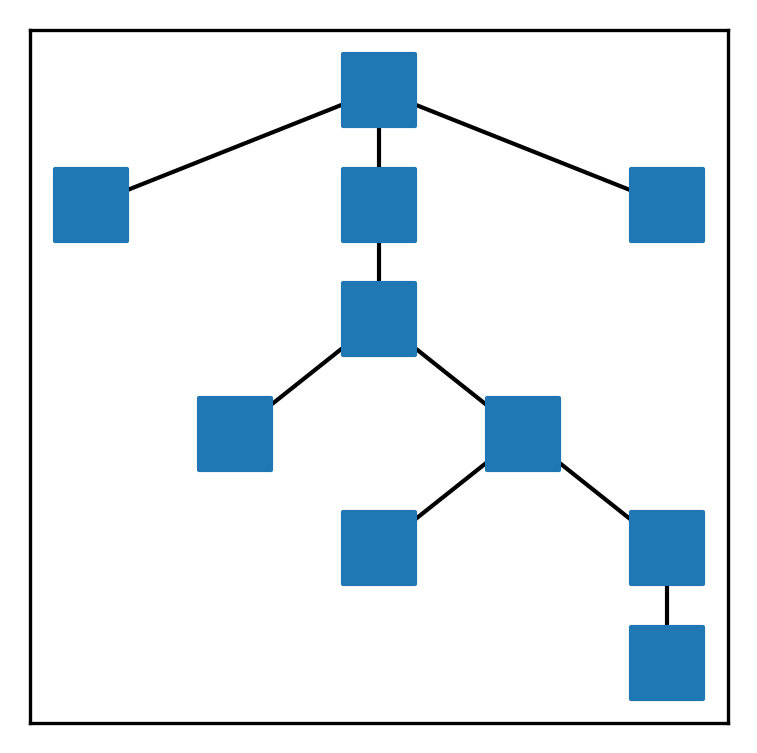

In [271]:
import igraph as ig
import matplotlib.pyplot as plt

def generate_graph():
    dg = nx.random_tree(n=10, create_using=nx.DiGraph, seed=10)

    g = ig.Graph()
    nodes = list(dg.nodes)
    g.add_vertices(n=nodes)
    edges = list(dg.edges)
    g.add_edges(edges)
    layout = g.layout_reingold_tilford(root=[0])
    pos = {k: v for k, v in zip(nodes, layout.coords)}

    x_vals, y_vals = [v[0] for k, v in pos.items()], [v[1] for k, v in pos.items()]
    min_y, max_y = min(y_vals), max(y_vals)
    min_x, max_x = min(x_vals), max(x_vals)

    norm_x = [(x - min_x) / (max_x - min_x) for x in x_vals]
    norm_y = [(y - min_y) / (max_y - min_y) for y in y_vals]
    pos = {k: (x, 1 - y) for k, x, y in zip(list(pos.keys()), norm_x, norm_y)}
    return dg, pos

dg, pos = generate_graph()
plt.close()

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
#ax.axis("off")

nx.draw_networkx_edges(G=dg, pos=pos, node_shape="s", node_size=200, arrows=False, ax=ax)

#nodes = nx.draw_networkx_nodes(G=dg, pos=pos, node_shape="s", node_size=100)

nodelist=list(dg)
xy = np.asarray([pos[v] for v in nodelist])
node_size=300
node_shape="s"
ax=ax

xy = np.asarray([pos[v] for v in nodelist])

node_collection = ax.scatter(
    xy[:, 0],
    xy[:, 1],
    s=node_size,
    marker='s',
)

bb = getbb(sc=node_collection, ax=ax)
bb = [bb_to_extent(ele) for ele in bb]

In [246]:
bb = getbb(sc=node_collection, ax=ax)

In [211]:
def bb_to_extent(bb):
    bb = bb._points
    l, b = bb[0][0], bb[0][1]
    r, t = bb[1][0], bb[1][1]
    print(r-l, t-b)
    return (l, r, b, t)

In [286]:
min([10, 2])

2

In [285]:
from PIL import Image

kk = 20

ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, kk + 1) for k_lower in range(1, kk + 1) if k_lower <= k_upper}

# Create a new 40x40 image with white background
for ind_i in ind:
    img = Image.new('RGB', (40, 40), color='blue')

    # Save the image to file
    img.save(f'/Users/benbarlow/dev/clustree/tests/data/input/{ind_i}.png')

In [284]:
p = "/Users/benbarlow/dev/sandbox"
from pathlib import Path

p = Path(p / Path("my_fig2.png"))

cv2.imread(str(p))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [244]:

def getbb(sc, ax):
    """ Function to return a list of bounding boxes in data coordinates
        for a scatter plot """
    ax.figure.canvas.draw() # need to draw before the transforms are set.
    transform = sc.get_transform()
    transOffset = sc.get_offset_transform()
    offsets = sc._offsets
    paths = sc.get_paths()
    transforms = sc.get_transforms()

    if not transform.is_affine:
        paths = [transform.transform_path_non_affine(p) for p in paths]
        transform = transform.get_affine()
    if not transOffset.is_affine:
        offsets = transOffset.transform_non_affine(offsets)
        transOffset = transOffset.get_affine()

    if isinstance(offsets, np.ma.MaskedArray):
        offsets = offsets.filled(np.nan)

    bboxes = []

    if len(paths) and len(offsets):
        if len(paths) < len(offsets):
            # for usual scatters you have one path, but several offsets
            paths = [paths[0]]*len(offsets)
        if len(transforms) < len(offsets):
            # often you may have a single scatter size, but several offsets
            transforms = [transforms[0]]*len(offsets)

        for p, o, t in zip(paths, offsets, transforms):
            result = get_path_collection_extents(
                transform.frozen(), [p], [t],
                [o], transOffset.frozen())
            bboxes.append(result.transformed(ax.transData.inverted()))

    return bboxes

In [152]:
nodes.get_tightbbox(renderer='png')


Bbox([[100.0, 87.99999999999999], [720.0, 704.0]])

In [112]:
pos_tr = {k: axis_to_data.transform(v) for k, v in pos.items()}

{0: array([-1.21 , -0.525]),
 1: array([-3.63 ,  5.525]),
 2: array([ 1.21 , 23.675]),
 3: array([ 1.21 , 11.575]),
 4: array([-1.21 ,  5.525]),
 5: array([ 1.21 , 29.725]),
 6: array([1.21 , 5.525]),
 7: array([-1.21 , 11.575]),
 8: array([ 1.21 , 17.625]),
 9: array([-1.21 , 17.625])}

In [113]:
{k: axis_to_data.inverted().transform(v) for k, v in pos.items()}

{0: array([0.5       , 0.08677686]),
 1: array([0.08677686, 0.25206612]),
 2: array([0.91322314, 0.74793388]),
 3: array([0.91322314, 0.41735537]),
 4: array([0.5       , 0.25206612]),
 5: array([0.91322314, 0.91322314]),
 6: array([0.91322314, 0.25206612]),
 7: array([0.5       , 0.41735537]),
 8: array([0.91322314, 0.58264463]),
 9: array([0.5       , 0.58264463])}

In [114]:
pos

{0: [0.0, 0.0],
 1: [-1.0, 1.0],
 2: [1.0, 4.0],
 3: [1.0, 2.0],
 4: [0.0, 1.0],
 5: [1.0, 5.0],
 6: [1.0, 1.0],
 7: [0.0, 2.0],
 8: [1.0, 3.0],
 9: [0.0, 3.0]}

In [109]:
pos_in_data

{0: array([0., 0.]),
 1: array([-1.,  1.]),
 2: array([1., 4.]),
 3: array([1., 2.]),
 4: array([0., 1.]),
 5: array([1., 5.]),
 6: array([1., 1.]),
 7: array([0., 2.]),
 8: array([1., 3.]),
 9: array([0., 3.])}

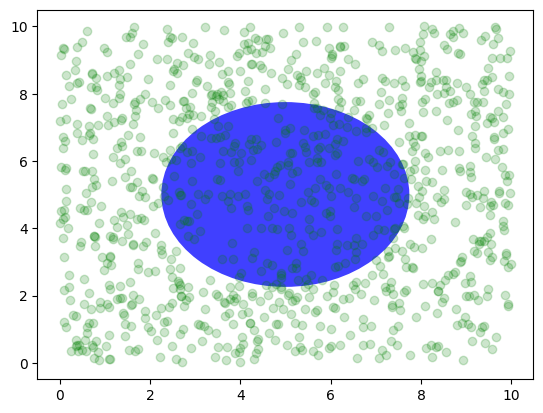

In [24]:
import numpy as np
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go', alpha=0.2)  # plot some data in data coordinates

circ = mpatches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

In [4]:
import cv2

img_path = '/Users/benbarlow/dev/clustree/tests/data/input/1_1.png'
img = cv2.imread(img_path)

img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

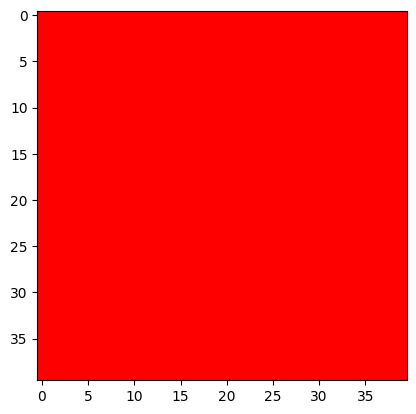

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(img)

In [1]:
import numpy as np


def grade(g2):
    w1 = 0.25
    w2 = 0.75
    g1 = 85
    return (w1 * g1) + (w2 * g2)

for g2 in range(52, 62, 2):
    print(g2, grade(g2=g2))

60
62
63

52 60.25
54 61.75
56 63.25
58 64.75
60 66.25
